Student Performance Indicator

1) Problem statement
This project understands how the student's performance (test scores) is affected by variables such as Gender and Test preparation course.
2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import random
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv(r"C:\Users\Dharini U\Desktop\PG Degree\Machine Learning\DataSets\stud.csv")

In [5]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [47]:
data.shape

(1000, 8)

In [48]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [49]:
data.duplicated().sum()

0

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [51]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [52]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Statistics of data set

In [53]:
data.describe() 

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring the data

In [54]:
print("The categories are")
print(data['gender'].unique())
print(data['race_ethnicity'].unique())
print(data['parental_level_of_education'].unique())
print(data['lunch'].unique())
print(data['test_preparation_course'].unique())

The categories are
['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [55]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Now Let us consider the following columns and explore and make a conclusion

In [6]:
data.drop(columns=['race_ethnicity','parental_level_of_education','lunch'],inplace=True)

In [7]:
#adding the numerical feature to get total score and average
data['total_score'] =data['math_score']+ data['reading_score']+ data['writing_score']
data['average'] =data['total_score']/3
data.head()

,gender,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,none,72,72,74,218,72.666667
1,female,completed,69,90,88,247,82.333333
2,female,none,90,95,93,278,92.666667
3,male,none,47,57,44,148,49.333333
4,male,none,76,78,75,229,76.333333


In [9]:
math_full= data[data['math_score']==100]['average'].count()
reading_full= data[data['reading_score']==100]['average'].count()
writing_full= data[data['writing_score']==100]['average'].count()
print(f'full score in math:{math_full}' )
print(f'full score in reading:{reading_full}')
print(f'full score in writing:{writing_full}')

full score in math:7
full score in reading:17
full score in writing:14


In [11]:
math_full= data[data['math_score']==100]['average'].count()
reading_full= data[data['reading_score']==100]['average'].count()
writing_full= data[data['writing_score']==100]['average'].count()
print(f'full score in math:{math_full}' )
print(f'full score in reading:{reading_full}')
print(f'full score in writing:{writing_full}')

full score in math:7
full score in reading:17
full score in writing:14


In [61]:
data1=data[['gender','test_preparation_course','math_score','reading_score','writing_score','total_score','average']]
data1.head()

,gender,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,none,72,72,74,218,72.666667
1,female,completed,69,90,88,247,82.333333
2,female,none,90,95,93,278,92.666667
3,male,none,47,57,44,148,49.333333
4,male,none,76,78,75,229,76.333333


Statistics of the data1 data frame

In [131]:
data1.describe() 

,math_score,reading_score,writing_score,total_score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


Probability: gender vs test_preparation_course using Bayes Theorem

In [134]:
print(data1['gender'].value_counts())

gender
female    518
male      482
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x17fc1c690d0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.033911133252536786, -0.5990409293541875, '48.2%')])

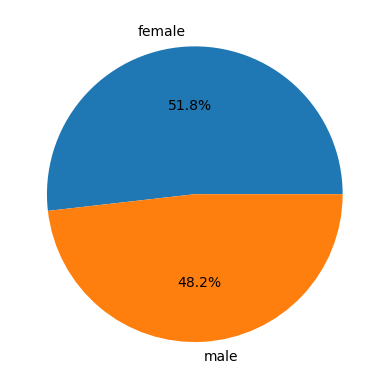

In [151]:
labels = 'female','male'
sizes = (data1['gender'].value_counts())

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%')

In [135]:
print(data1['test_preparation_course'].value_counts())

test_preparation_course
none         642
completed    358
Name: count, dtype: int64


([<matplotlib.patches.Wedge at 0x17fc1918a90>,
 [Text(-0.47460171119818767, 0.9923473261553901, 'Completed'),
  Text(0.4746018041084478, -0.9923472817199666, 'none')],
 [Text(-0.2588736606535569, 0.5412803597211218, '64.2%'),
  Text(0.2588737113318806, -0.5412803354836181, '35.8%')])

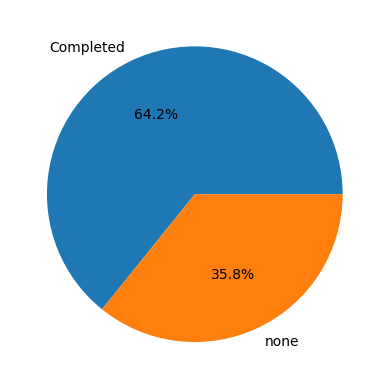

In [148]:
labels = 'Completed','none'
sizes = (data1['test_preparation_course'].value_counts())

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%')

Probability using Bayes Theorem

In [63]:
num_rows = float(data1.shape[0])
print(num_rows)
d_completed= (data1.test_preparation_course=="completed").sum() / num_rows 
print(d_completed)
d_notcompleted = 1 - d_completed
print(d_notcompleted)

1000.0
0.358
0.642


In [64]:
d_male= (data1.gender=="male").sum() / num_rows 
print(d_male)
d_female = 1 - d_male
print(d_female)

0.482
0.518


Now we will calculate did gender(female) affect the test_preparation_course completion

In [65]:
number_of_female = data1[data1.gender=='female'].shape[0] 
female_who_completed = data1[(data1.gender=='female') & (data1.test_preparation_course=="completed")].shape[0]
d_female_completed = female_who_completed / float(number_of_female)
d_female_completed

0.3552123552123552

In [133]:
d_female_not_completed=1 -d_female_completed
d_female_not_completed

0.6447876447876448

In [68]:
number_of_male = data1[data1.gender=='male'].shape[0] 
male_who_completed = data1[(data1.gender=='male') & (data1.test_preparation_course=="completed")].shape[0]
d_male_completed = male_who_completed / float(number_of_male)
d_male_completed

0.36099585062240663

In [137]:
d_male_not_completed=1 -d_male_completed
d_male_not_completed

0.6390041493775933

From the Above results we can find that female students are less who completed the course than the male students

([<matplotlib.patches.Wedge at 0x17fc19def50>,
 [Text(-0.013952428225546638, 1.0999115099618746, 'male'),
  Text(0.013952325244398761, -1.0999115112681905, 'female')],
 [Text(-0.007610415395752711, 0.5999517327064771, '50.4%'),
  Text(0.0076103592242175045, -0.5999517334190129, '49.6%')])

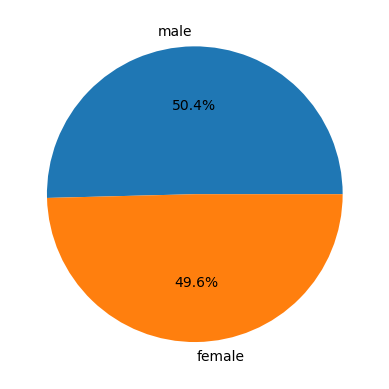

In [145]:
labels = 'male', 'female'
sizes = [d_male_completed, d_female_completed]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%')

not completed the course

([<matplotlib.patches.Wedge at 0x17fc1906110>,
 [Text(0.007783979354163172, 1.0999724585940387, 'male'),
  Text(-0.0077838763673091695, -1.0999724593228226, 'female')],
 [Text(0.004245806920452639, 0.5999849774149302, '49.8%'),
  Text(-0.004245750745805001, -0.5999849778124486, '50.2%')])

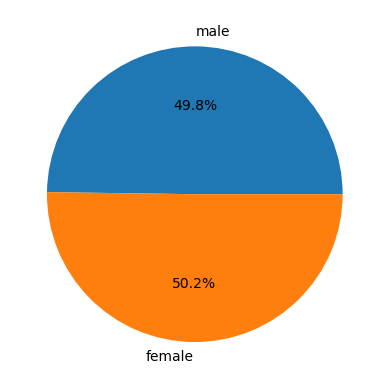

In [144]:
labels = 'male', 'female'
sizes = [d_male_not_completed, d_female_not_completed]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels,autopct='%1.1f%%')

Visualization

In [101]:
np.mean(data1['total_score'])

203.312

In [121]:
highest_score = np.max(data1['total_score'])
print(highest_score)

300


In [132]:
print(data1['gender'].value_counts())

gender
female    518
male      482
Name: count, dtype: int64


Text(0, 0.5, 'count')

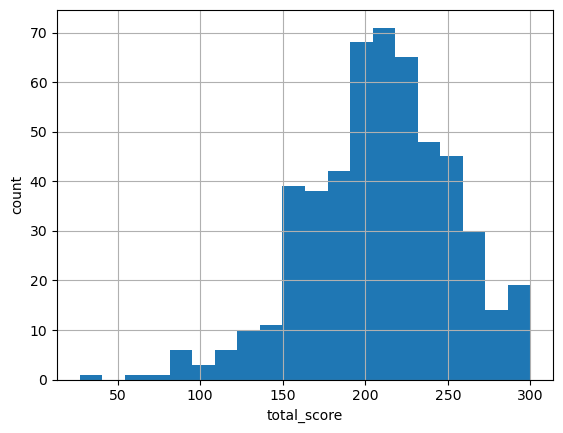

In [129]:
female_students = data1[data1['gender']=='female']
female_students['total_score'].hist(bins=20)
plt.xlabel('total_score')
plt.ylabel('count')

Text(0, 0.5, 'count')

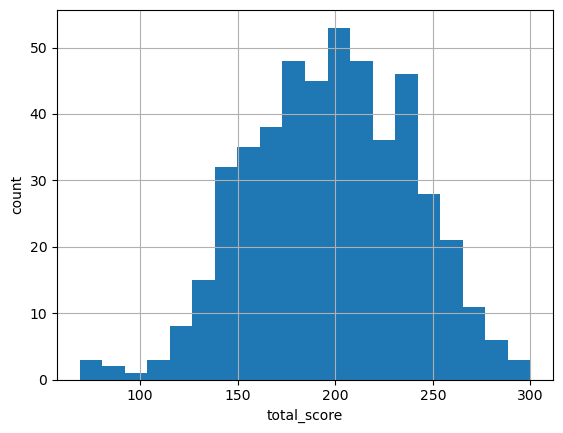

In [130]:
female_students = data1[data1['gender']=='male']
female_students['total_score'].hist(bins=20)
plt.xlabel('total_score')
plt.ylabel('count')

In [125]:
Highest_avg_score=np.max(data1['average'])
print(Highest_avg_score)

100.0


Text(0, 0.5, 'count')

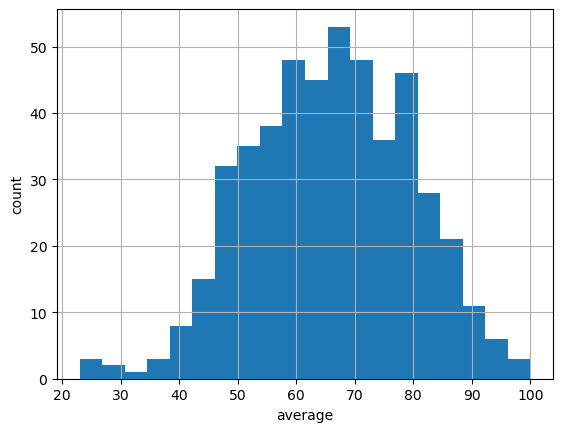

In [152]:
female_students = data1[data1['gender']=='male']
female_students['average'].hist(bins=20)
plt.xlabel('average')
plt.ylabel('count')

Text(0, 0.5, 'count')

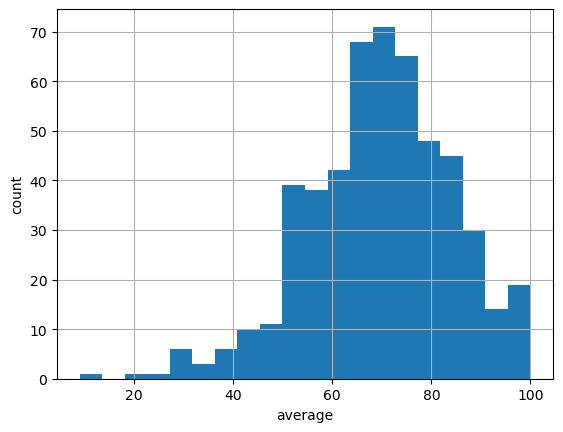

In [153]:
female_students = data1[data1['gender']=='female']
female_students['average'].hist(bins=20)
plt.xlabel('average')
plt.ylabel('count')

Text(0, 0.5, 'Count')

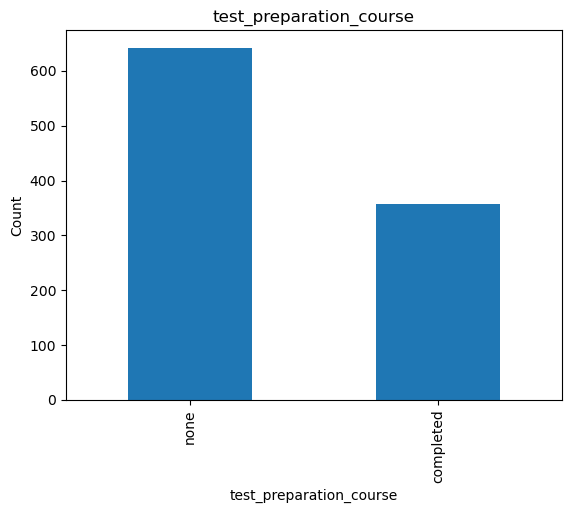

In [164]:
data1.test_preparation_course.value_counts().plot(kind='bar', title='test_preparation_course')
plt.xlabel('test_preparation_course')
plt.ylabel('Count')

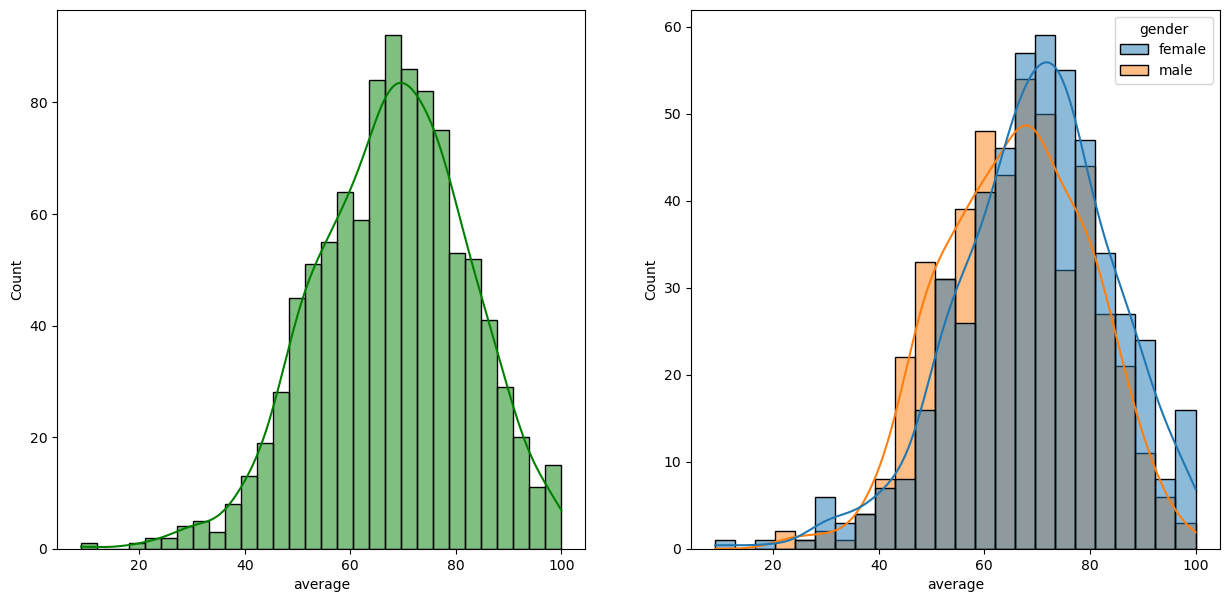

In [156]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

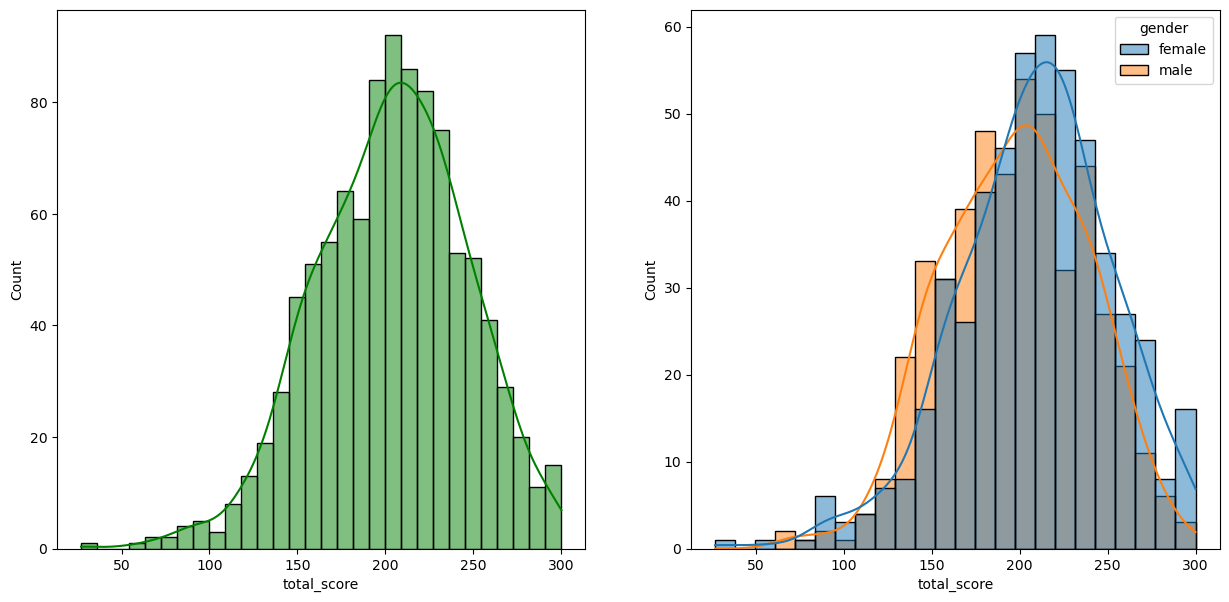

In [158]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

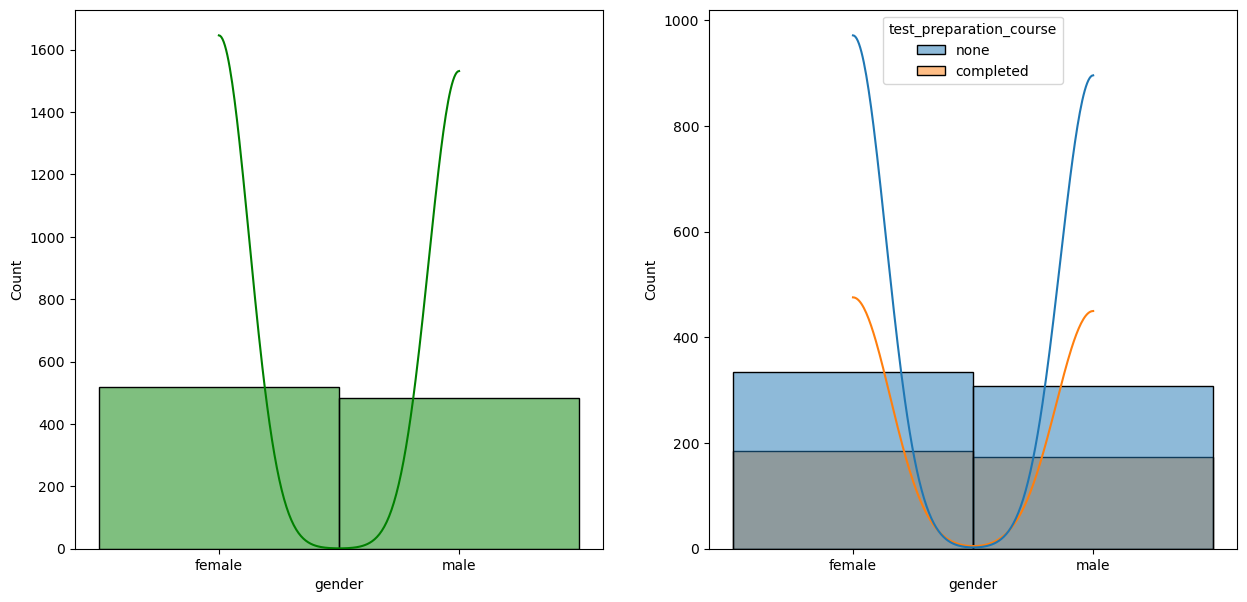

In [168]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='gender',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='gender',kde=True,hue='test_preparation_course')
plt.show()

Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.